## Put-Call Parity

There’s a useful connection between European put and call prices that tells us, in effect, that if you know the price of one you can easily compute the price of the other. With a call option, you buy the asset if its price is above k, and with a put you sell it if the price is below k. So buying a call and selling a put at the same strike leads you to own the stock in all cases. The price is $k$, paid at $t + \tau$, so we discount it using the price $q_{t}^{\tau}$ (the price at t of one dollar paid at $t + 
\tau$). 

This gives us two ways to buy the stock at date t, directly and with options. Absence of arbitrage tells us both methods should cost the same:
<p id = "putcall">
$$\begin{equation} \underbrace{q_{t}^{c}}_{\text{buy call}} - \underbrace{q_{t}^{p}}_{\text{sell put}} = \underbrace{s_t}_{\text{buy stock}} - \underbrace{q_{t}^{\tau}k}_{\text{present value of strike}} \end{equation}\tag{1}$$
</p>

This can be easily understood by looking at the payoffs of the two portfolios. Let $s_t = 95$, $q_{t}^{\tau} = .98$, and $k = 100$. 

In [71]:
# using Pkg
# Pkg.add("PGFPlots")

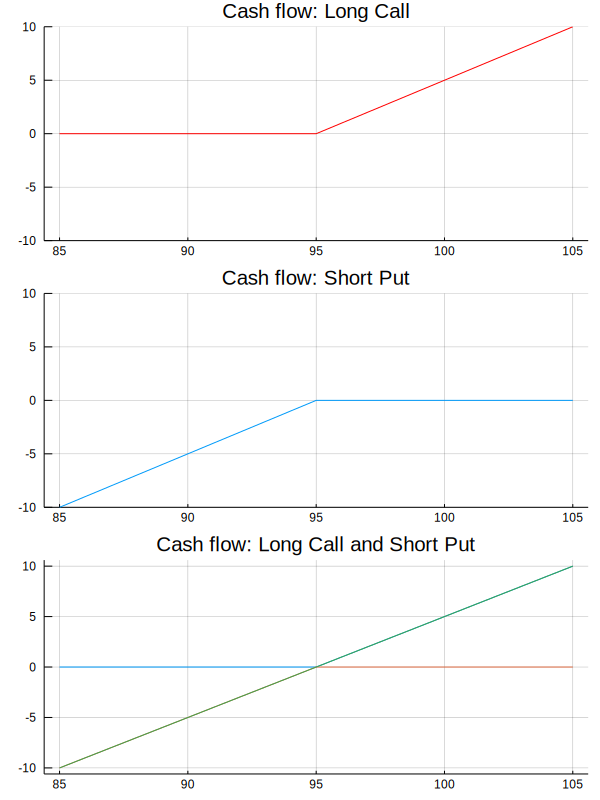

In [72]:
using Plots

k = 95
prices = 85:105
call = [max(0, x - k) for x ∈ prices]
put = [min(0, x - k) for x ∈ prices]

c = plot(prices, call, 
         title = "Cash flow: Long Call",
         ylims = (-10,10),
         linecolor = "red",
         gridalpha = .3,
         legend = false)

p = plot(prices, put, 
         title = "Cash flow: Short Put",
         ylims = (-10,10),
         gridalpha = .3,
         legend = false)

cp = plot(prices, [call, put, -10:10], 
          title = "Cash flow: Long Call and Short Put",
          gridalpha = .3,
          legend = false)

plot(c, p, cp, 
     layout = (3,1),
     size = (600, 800))

## The Normal Distribution Function

Recall that if x is a normal with $\mu = 0$ and $\sigma^2 = 1$ ("standard normal"), its probability density function (pdf) is given by,

<p id = "normalpdf">
$$\begin{equation} p(x) = (2\pi)^{-\frac{1}{2}}\exp{(-x^2 / 2)} \end{equation} \tag{2}$$
</p>

for any real number x. This function is always positive, integrates to one, and is symettric ($p(x) = p(-x)$).

The cumulent distribution function (cdf), is defined by

$$\text{Prob}(x \leq x^*) = \int_{-\infty}^{x^*}{p(x)dx} = N(x^*)$$

There is no simple antiderivative of $p$, but it comes up so frequently that we give it the label $N$. 

We can do the same with other normal random variables. The ranom variable $y = \mu + \sigma x$ is normal with mean $\mu$ and variance $\sigma^2$. Since $x = (y - \mu )/\sigma)$ is standard normal, we can compute the cumulative probabilities for y using

$$\begin{equation} \text{Prob}(x \leq x^*) = \text{Prob}(x \leq (y - \mu )/\sigma)  = N[(y - \mu )/\sigma]\end{equation}$$

One final property: since $p$ is symmetric, $N(-x) = 1 - N(x). Note That

$$\begin{equation} \int_{-\infty}^{x^*}{p(x)dx} + \int_{x^*}^{\infty}{p(x)dx} = 1 \end{equation}.$$

This implies

$$\begin{equation} 1 - N(x^*) = \int_{x^*}^{\infty}{p(x)dx} = \int_{-\infty}^{-x^*}{p(-x)dx} = N(-x^*)\end{equation},$$

which follows by the symmetry of $p$. This is very easy to show by graphing the pdf and its tail integrals.

In [ ]:
# Pkg.add("Distributions")
# Pkg.add("StatsPlots")
using Distributions, StatsPlots

plot(Normal(0,1), 
     title = "Normal Distribution",
     lw=3,
     legend = false,
     size = (800, 400))

plot!(-3:.1:-2, pdf.(Normal(0,1), -3:.01:2))
# Pkg.add("StatsPlots")
using Distributions, StatsPlots

plot(Normal(0,1), 
     title = "Normal Distribution",
     lw=3,
     legend = false,
     size = (800, 400))

plot!(-3:.1:-2, pdf.(Normal(0,1), -3:.01:2))

┌ Info: Recompiling stale cache file C:\Users\samfi\.julia\compiled\v1.2\Distributions\xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\samfi\.julia\compiled\v1.2\StatsPlots\SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240
